In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [4]:
img_as_arr = mpimg.imread('palm_trees.jpg')

In [5]:
img_as_arr

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

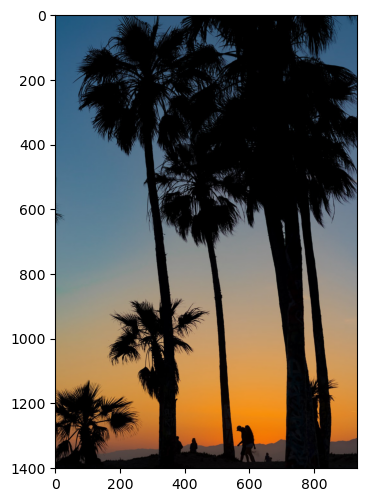

In [38]:
plt.figure(figsize=(6,6),dpi=100)
plt.imshow(img_as_arr)

In [11]:
img_as_arr.shape #hwc

(1401, 934, 3)

In [12]:
(h,w,c) = img_as_arr.shape

In [13]:
h

1401

In [14]:
w

934

In [15]:
c

3

In [18]:
img_as_arr_2d = img_as_arr.reshape(h*w,c)  #----> Converting a 3 dimensional img to 2 dimensional image

In [19]:
len(img_as_arr_2d.shape)  

2

In [20]:
img_as_arr_2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [21]:
from sklearn.cluster import KMeans

In [22]:
model = KMeans(n_clusters=7)

In [23]:
model

KMeans(n_clusters=7)

In [24]:
label = model.fit_predict(img_as_arr_2d)

In [25]:
label

array([6, 6, 6, ..., 0, 0, 0])

In [26]:
model.cluster_centers_

array([[  2.72399113,   2.54837976,   3.67580066],
       [100.27394222, 128.57649208, 146.58021262],
       [200.92947526, 154.21709223,  98.01774835],
       [154.88060199, 149.51504372, 138.57185771],
       [ 67.66387492,  60.38871823,  59.65583029],
       [219.57769882, 131.90239478,  41.18618306],
       [ 58.17700819,  98.56277243, 130.55675624]])

In [29]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [30]:
rgb_codes

array([[  3,   3,   4],
       [100, 129, 147],
       [201, 154,  98],
       [155, 150, 139],
       [ 68,  60,  60],
       [220, 132,  41],
       [ 58,  99, 131]])

In [33]:
quantized_img = np.reshape(rgb_codes[label],(h,w,c))  #---> Switching Back to 3 dimensional

In [34]:
len(quantized_img.shape)

3

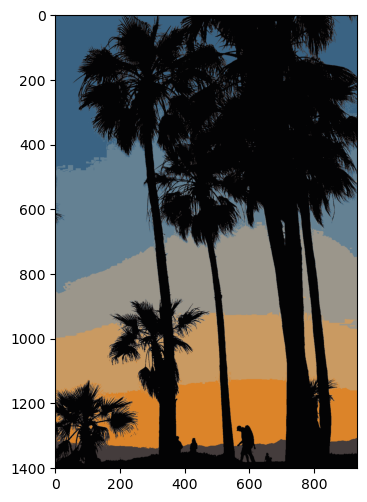

In [36]:
plt.figure(figsize=(6,6),dpi=100)
plt.imshow(quantized_img)

 CONCLUSION -: So by forming clusters I have successfully quantized the image to use only 7 colors by taking the no. of 
                 clusters to 7.